In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

# Create a transpose convolution instance

In [2]:
# create a ConvTranspose2d class instance with parameters

# parameters
inChans  = 3 # RGB
outChans = 15
krnSize  = 5 # should be an odd number
stride   = 1
padding  = 0

# create the instance
c = nn.ConvTranspose2d(inChans,outChans,krnSize,stride,padding)

# let's have a look at it
print(c)
print(' ')

# check out its weight tensor; what are the dimensions?
print( 'Size of weights: ' + str(c.weight.shape) )
print( 'Size of bias: ' + str(c.bias.shape) )


ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([3, 15, 5, 5])
Size of bias: torch.Size([15])


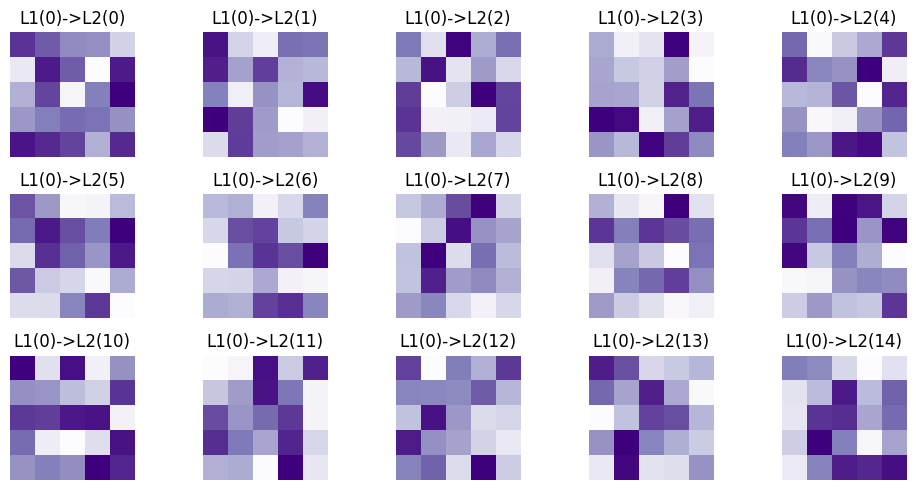

In [3]:
# What do these kernels look like?

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[0,i,:,:]).detach(),cmap='Purples')
  ax.set_title('L1(0)->L2(%s)'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

# Convolve with an image

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


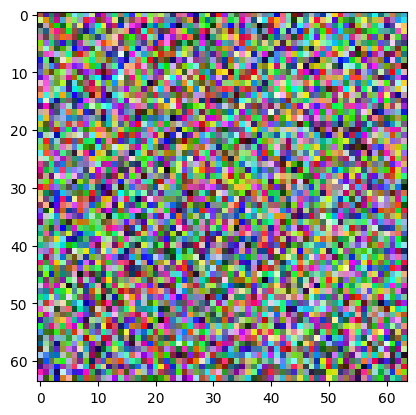

In [4]:
# size of the image (N, RGB, width, height)
imsize = (1,3,64,64)

img = torch.rand(imsize)

# pytorch wants channels first, but matplotlib wants channels last.
# therefore, tensors must be permuted to visualize
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

In [5]:
# convolve the image with the filter bank (set of 'outChans' kernels)
convRes = c(img)

print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])


torch.Size([1, 15, 68, 68])
(68, 68, 15, 1)
(68, 68, 15)


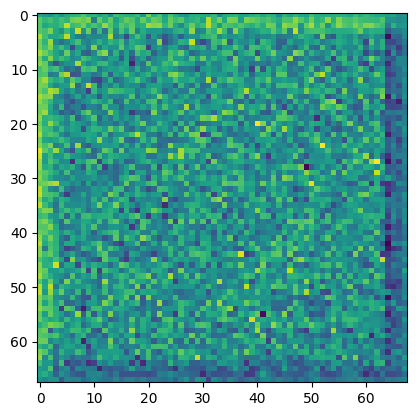

In [20]:
# View the concolved image
convRes2view = convRes.permute(2,3,1,0).detach().numpy()
print(convRes.shape)
print(convRes2view.shape)

im2show = np.squeeze(convRes2view)
print(im2show.shape)

plt.imshow(convRes[0,1,:,:].data);

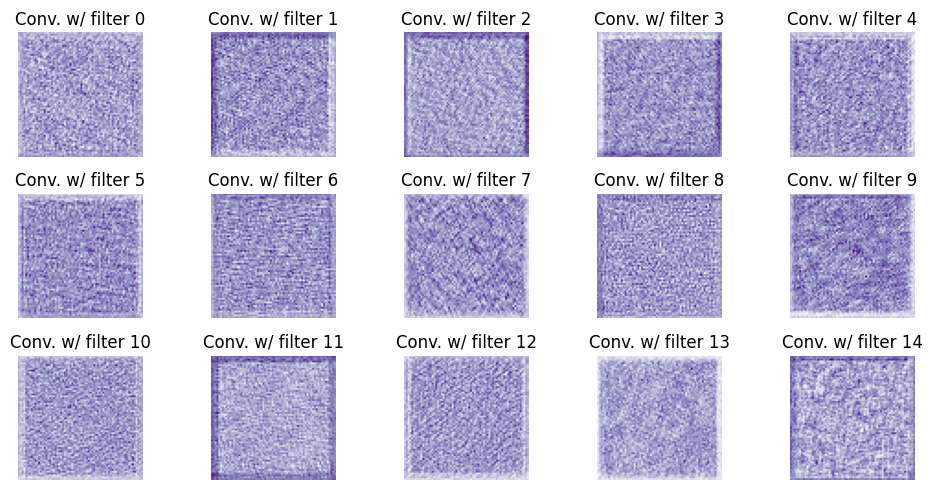

In [16]:
# What do the convolved images look like? (Hint: think of the bathtub picture.)

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0,i,:,:]).detach()

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()